In [1]:
import pandas as pd
df=pd.read_csv("C:/SUJITHKS/FSDSRegression/notebooks/data/gemstone.csv")
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [2]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# Null check 

In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
#No missing  values

# Check for type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


# ID has no dependency so drop it

In [6]:
df=df.drop(labels=['id'],axis=1)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# Check for duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
#no duplocates

In [10]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='O']
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [11]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [12]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [14]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [15]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [16]:
df1=df.sample(5000)
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
96109,0.76,Premium,H,VS1,61.5,58.0,5.82,5.86,3.59,2961
151645,1.22,Premium,G,VVS2,60.8,58.0,6.89,6.93,4.19,10874
89033,1.12,Very Good,E,SI2,62.1,63.0,6.61,6.56,4.09,4277
25740,1.01,Very Good,J,SI1,63.0,58.0,6.38,6.42,4.02,3996
141969,0.30,Ideal,F,VVS1,61.4,55.0,4.31,4.36,2.66,1040
...,...,...,...,...,...,...,...,...,...,...
177474,0.70,Very Good,H,VS2,62.9,58.0,5.61,5.66,3.54,2282
180918,0.78,Ideal,D,SI2,61.8,56.0,5.89,5.92,3.64,2728
177909,1.12,Ideal,G,VVS2,60.8,56.0,6.72,6.77,4.11,8924
153836,0.30,Ideal,G,VS1,62.2,54.0,4.28,4.31,2.67,605


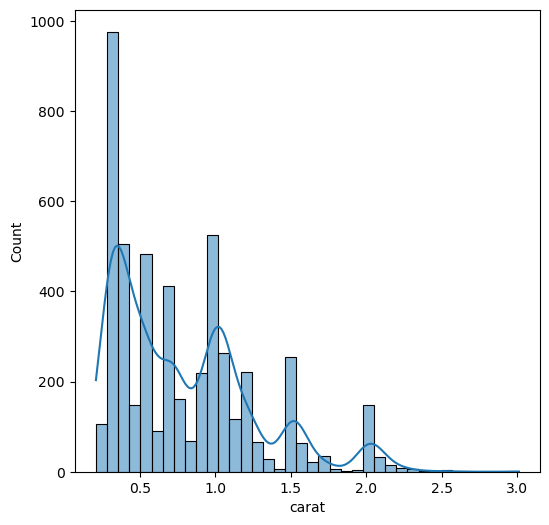

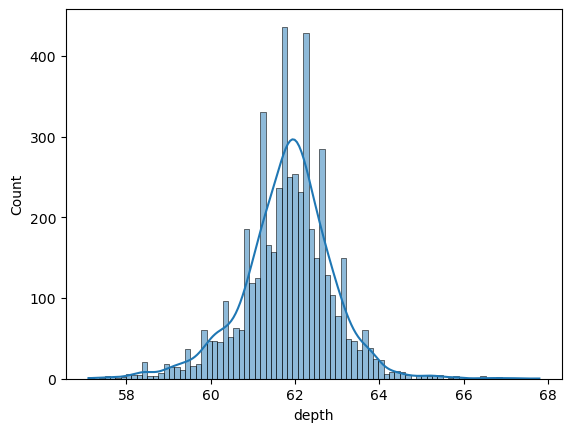

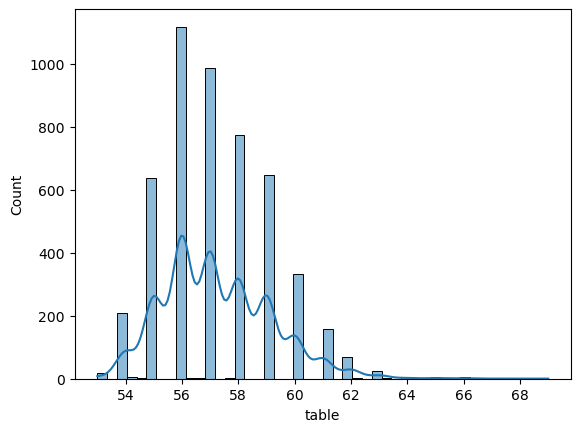

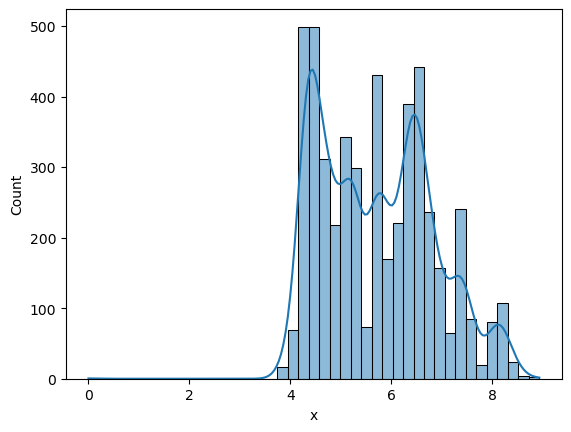

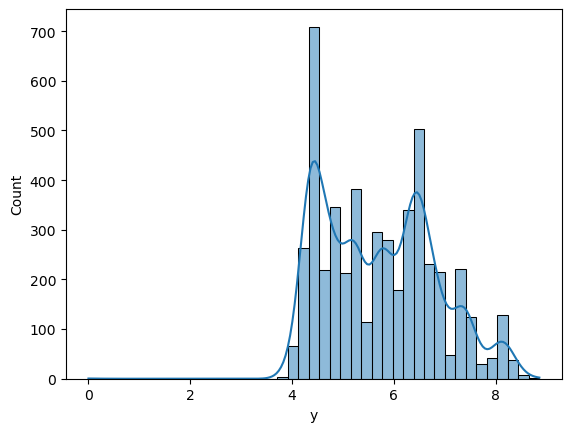

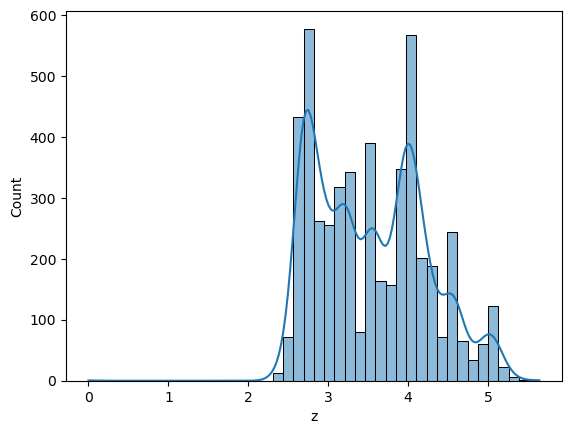

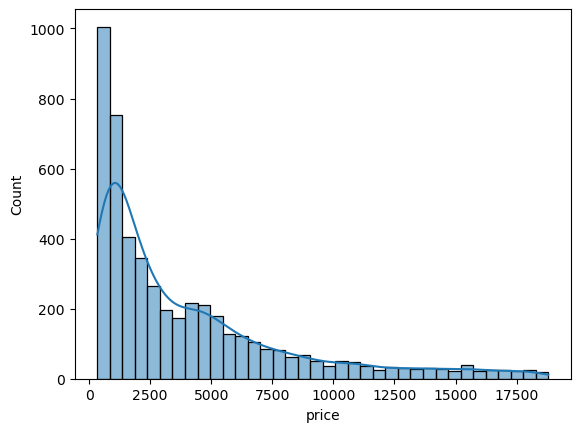

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df1,x=i,kde=True)
    print('\n')
    plt.show()

# Categorical PLot

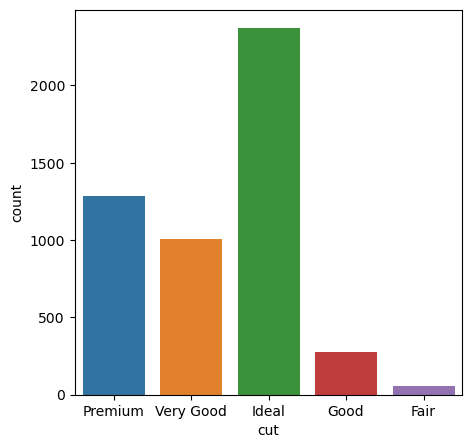

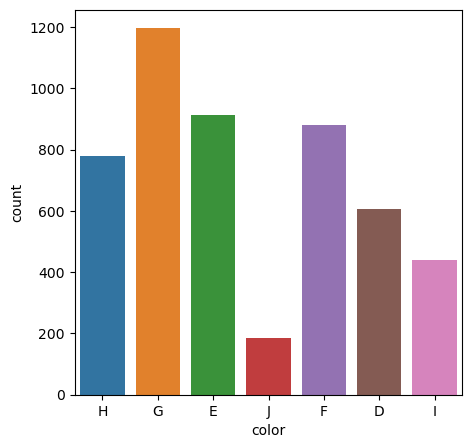

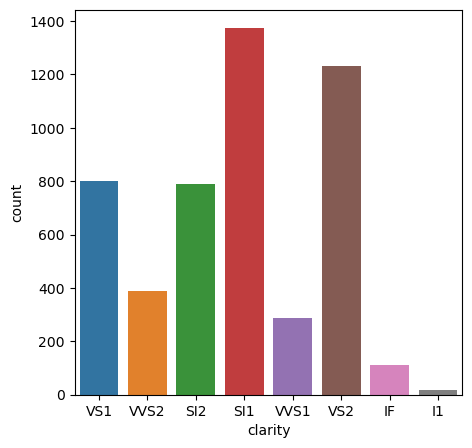

In [18]:
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x =i, data = df1)
    print('\n')
    plt.show()

# Stripplot plot - Categorical data

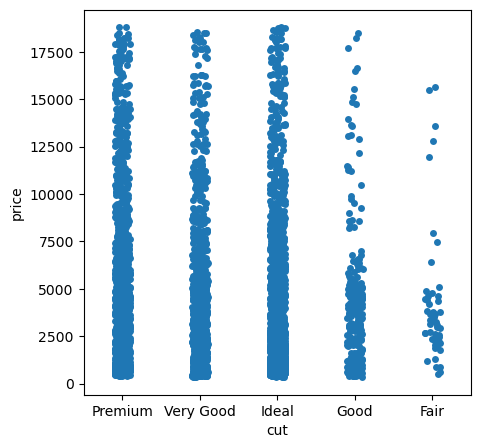

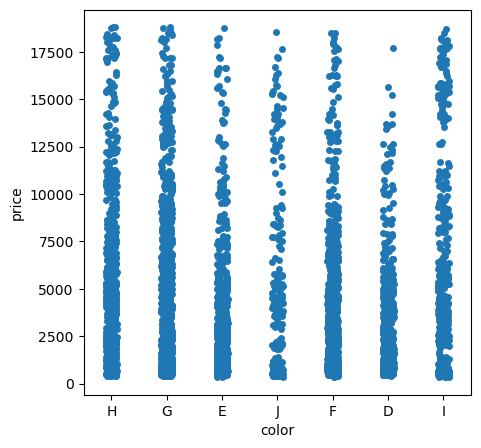

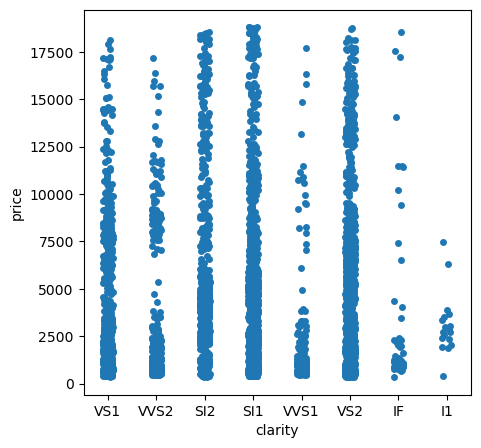

In [19]:
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(x =i, y ='price', data = df1, jitter = True, dodge = True)
    print('\n')
    plt.show()

In [20]:
#correlation

C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_20332\272655420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

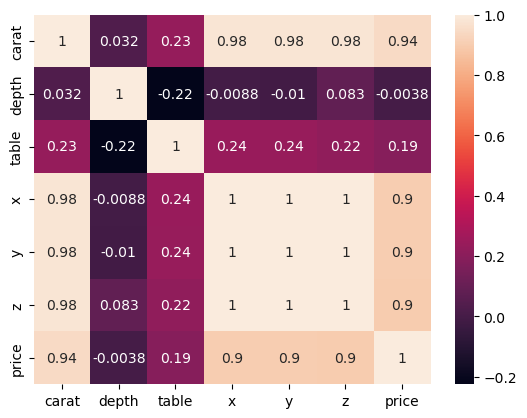

In [21]:
sns.heatmap(df1.corr(),annot=True)

In [22]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [23]:
df[categorical_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [24]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['color'].unique()
color_map= {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [25]:
color_map={"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
clarity_map={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [26]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
